# BMW — Carga, Limpieza, EDA y Modelado

Cuadernillo completo: carga del archivo Excel, limpieza, análisis exploratorio (gráficos) y entrenamiento/comparación de modelos.

In [64]:
from src.cleaning import clean_bmw_data  
import sys, os
import pandas as pd
from eda import plot_histograms, plot_correlations, plot_boxplot_price_by_model, plot_scatter
import matplotlib.pyplot as plt 
from model_utils import train_all_models
from evaluate import train_and_save_model, predict_new_data

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
SRC_PATH = os.path.join(PROJECT_ROOT, "src")
if SRC_PATH not in sys.path:
    sys.path.append(SRC_PATH)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("SRC_PATH added:", SRC_PATH)


PROJECT_ROOT: c:\bmw-data-analysis
SRC_PATH added: c:\bmw-data-analysis\src


## 1. Cargar datos

In [65]:
data_path = os.path.join(PROJECT_ROOT, "Data", "raw", "bmw.xlsx")
print("Leyendo:", data_path)
df = pd.read_excel(data_path)
print("Shape:", df.shape)
df.head()


Leyendo: c:\bmw-data-analysis\Data\raw\bmw.xlsx
Shape: (10781, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [66]:
print('Info:')
display(df.info())
print('\nDescribe:')
display(df.describe(include='all'))



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


None


Describe:


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10781,10781.000000,10781.000000,10781,10781.000000,10781,10781.000000,10781.000000,10781.000000
unique,24,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,3 Series,NaN,NaN,Semi-Auto,NaN,Diesel,NaN,NaN,NaN
freq,2443,NaN,NaN,4666,NaN,7027,NaN,NaN,NaN
mean,NaN,2017.078935,22733.408867,NaN,25496.986550,NaN,131.702068,56.399035,2.167767
std,NaN,2.349038,11415.528189,NaN,25143.192559,NaN,61.510755,31.336958,0.552054
min,NaN,1996.000000,1200.000000,NaN,1.000000,NaN,0.000000,5.500000,0.000000
25%,NaN,2016.000000,14950.000000,NaN,5529.000000,NaN,135.000000,45.600000,2.000000
50%,NaN,2017.000000,20462.000000,NaN,18347.000000,NaN,145.000000,53.300000,2.000000
75%,NaN,2019.000000,27940.000000,NaN,38206.000000,NaN,145.000000,62.800000,2.000000


## 2. Limpieza de datos

In [67]:

df_clean = clean_bmw_data(df)
print('Limpio shape:', df_clean.shape)
df_clean.head()


Limpio shape: (10734, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [68]:
processed_dir = os.path.join(PROJECT_ROOT, "Data", "processed")
os.makedirs(processed_dir, exist_ok=True)
clean_path = os.path.join(processed_dir, "bmw_clean.csv")
df_clean.to_csv(clean_path, index=False)
print("Guardado en:", clean_path)

Guardado en: c:\bmw-data-analysis\Data\processed\bmw_clean.csv


## 3. Análisis exploratorio (EDA)

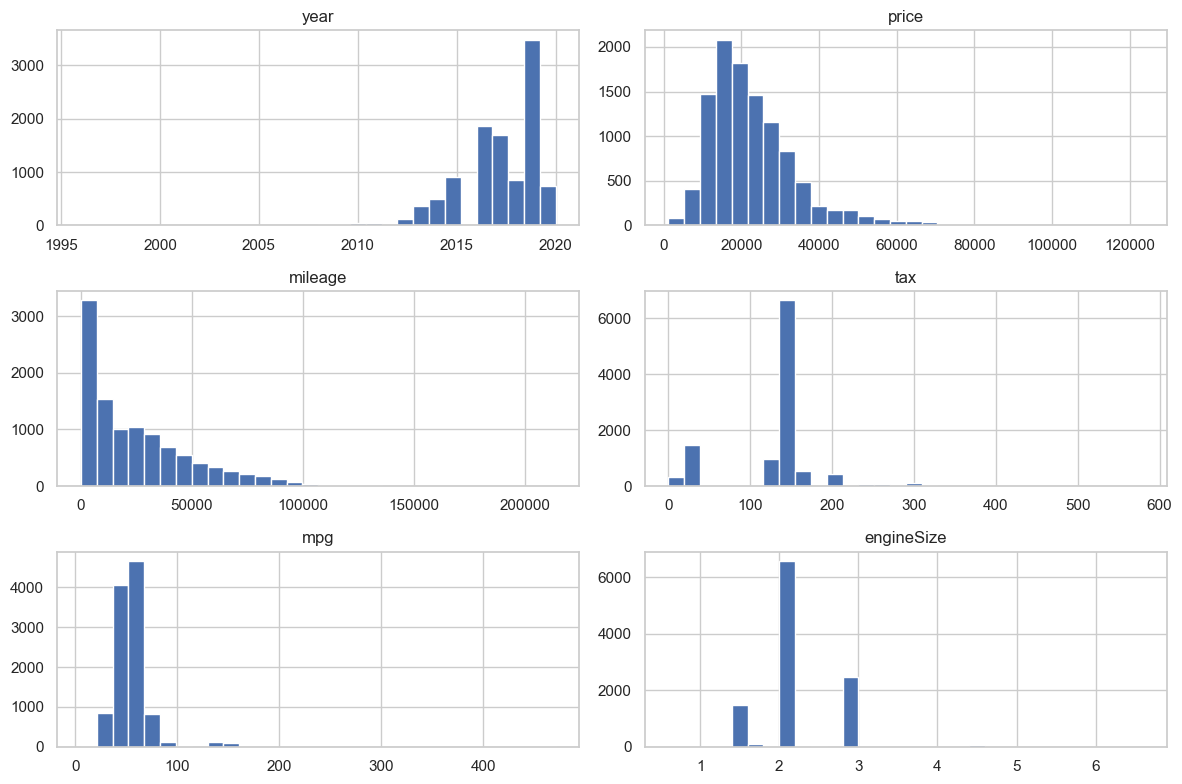

In [69]:
plot_histograms(df_clean)


Las distribuciones muestran que el conjunto de datos está compuesto principalmente por vehículos BMW recientes (entre 2015 y 2020), con precios concentrados entre 15.000 y 30.000. El kilometraje es mayormente bajo, coherente con la antigüedad de los autos. Las variables tax, mpg y engineSize presentan valores frecuentes y estandarizados, indicando poca variabilidad extrema. En general, las características del conjunto de datos son consistentes y adecuadas para el entrenamiento de modelos predictivos.

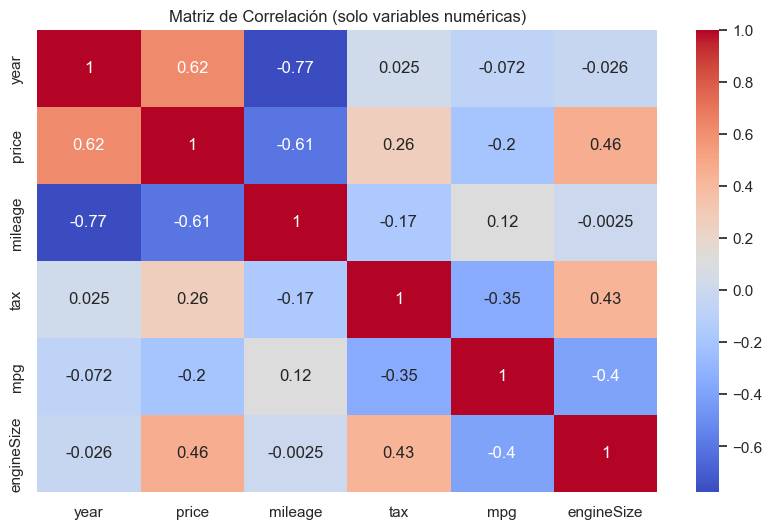

In [70]:
plot_correlations(df)


Pudimos observar que la matriz de correlación muestra que el precio depende principalmente de tres factores:

Año (+): autos más nuevos → precios más altos.

Kilometraje (–): más uso → precios más bajos.

EngineSize (+): motores más grandes → precios más altos.

Las demás variables tienen poca influencia. 
En general, la antigüedad, el uso y el tamaño del motor son los factores clave que explican el precio de un BMW.

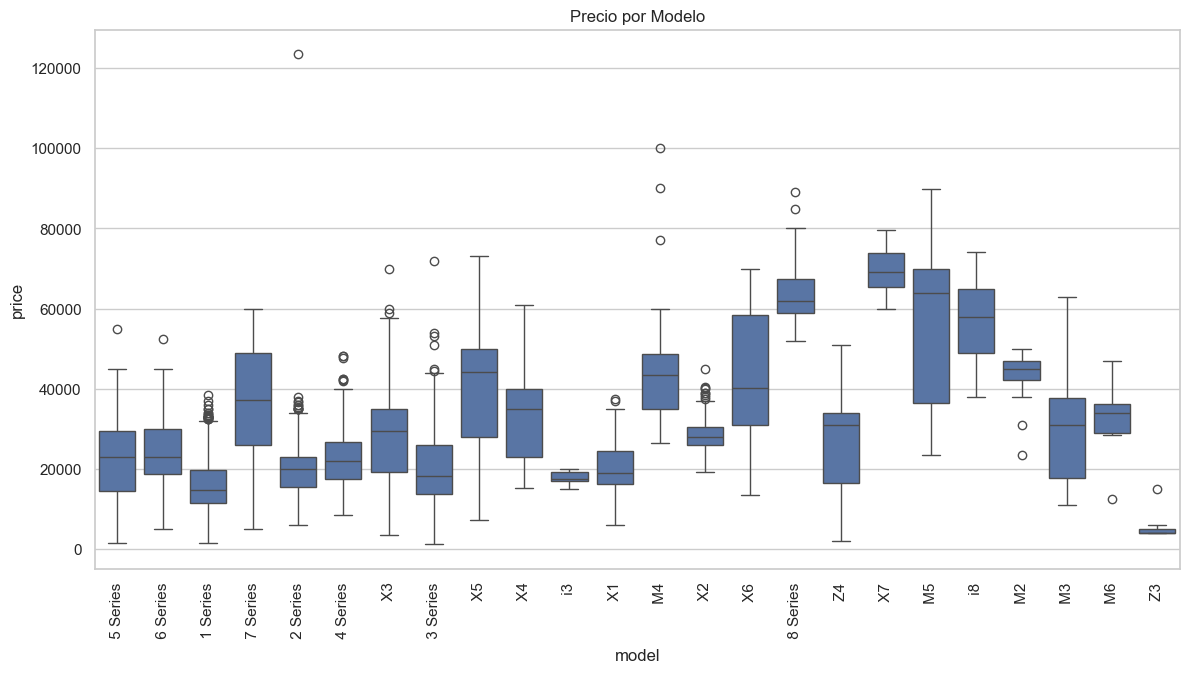

In [71]:

try:
    plot_boxplot_price_by_model(df_clean)
except Exception as e:
    print('No se pudo generar boxplot por modelo:', e)



Los precios varían mucho según el modelo: los BMW de gama alta como M5, X7, 8 Series y X6 son los más caros, mientras que 1 Series, 2 Series, i3 y Z3 son los más económicos. Esto confirma que el modelo es uno de los factores que más influye en el precio.

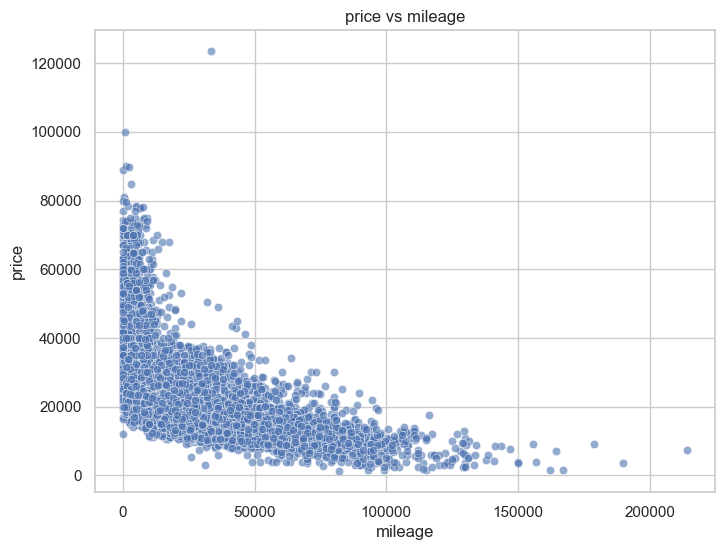

In [72]:
plot_scatter(df_clean, x='mileage', y='price')


Existe una relación negativa clara entre el precio y el kilometraje:

cuando aumenta el mileage, el precio disminuye notablemente. Los BMW con pocos kilómetros son mucho más costosos, mientras que los que tienen más recorrido se deprecian rápido. También aparecen algunos valores atípicos, pero la tendencia general es muy evidente.

## 4. Modelado y comparación de modelos

In [73]:
results = train_all_models(df_clean)
print('Resultados:')
results



Resultados:


{'Linear Regression': {'MAE': 3065.841847551518, 'R2': 0.8475973494374},
 'Decision Tree': {'MAE': 2019.0676359039192, 'R2': 0.8859239879093774},
 'Random Forest': {'MAE': 1540.8279135965904, 'R2': 0.9559995739522893}}

In [74]:
res_df = pd.DataFrame(results).T 
res_df = res_df.sort_values(by='MAE') if 'MAE' in res_df.columns else res_df
display(res_df)

,MAE,R2
Random Forest,1540.827914,0.956000
Decision Tree,2019.067636,0.885924
Linear Regression,3065.841848,0.847597


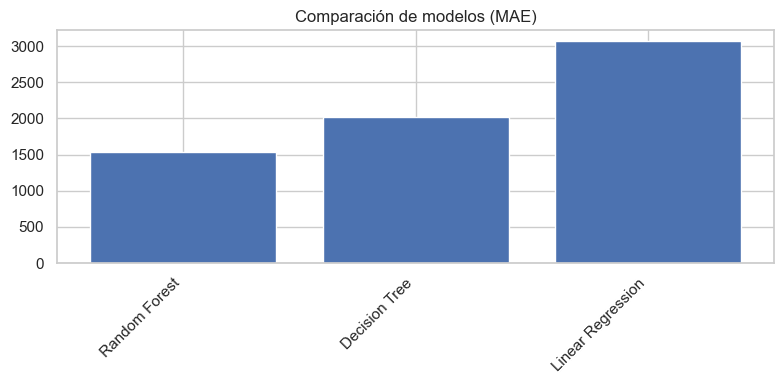

In [75]:
if 'MAE' in res_df.columns:
    plt.figure(figsize=(8,4))
    plt.bar(res_df.index, res_df['MAE'])
    plt.title('Comparación de modelos (MAE)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

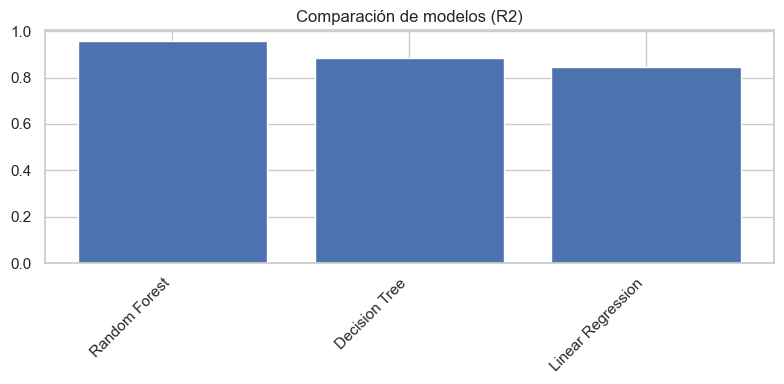

In [76]:
if 'R2' in res_df.columns:
    plt.figure(figsize=(8,4))
    plt.bar(res_df.index, res_df['R2'])
    plt.title('Comparación de modelos (R2)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 5. Conclusiones sobre las graficas de comparacion

Al comparar el error promedio (MAE) y el poder explicativo (R²) de los modelos, se observa que:

-Random Forest es el que logra el mejor desempeño. Es el que menos se equivoca al predecir el precio y el que mejor aprovecha la información de las variables.

-Decision Tree queda en segundo lugar. Funciona bien, pero es menos estable y tiende a variar más dependiendo de los datos.

-Linear Regression es el que peor resultado da, porque asume relaciones lineales que no parecen ajustarse del todo al comportamiento real del precio de los BMW.

## 6. Conclusión del grupo sobre el mejor modelo
Como grupo concluimos que el Random Forest es el mejor modelo para predecir el precio de los vehículos BMW. Fue el que obtuvo el MAE más bajo (menor error promedio) y el R² más alto, lo que significa que explica mejor la variación del precio y realiza predicciones más precisas.
En comparación, el Decision Tree tuvo un desempeño aceptable pero menos estable, y la Regresión Lineal fue la que mostró menor capacidad predictiva. Por esto, elegimos Random Forest como el modelo más adecuado para nuestro proyecto.

In [77]:

best_model_results = train_and_save_model(df)
best_model_results


{'MAE': 1606.7038839118397, 'R2': 0.9427908756629172}

In [87]:
nuevo_auto = {
    "model": "3 Series",
    "year": 2019,
    "mileage": 25000,
    "mpg": 42,
    "engineSize": 2.0,
    "fuelType": "Petrol",
    "transmission": "Automatic",
    "tax": 145
}

precio = predict_new_data(nuevo_auto)
print(f"Precio estimado: ${precio:,.2f}")




Precio estimado: $26,129.58


Probamos el modelo usando los mismos datos de un carro presente en el dataset y la predicción fue muy cercana al precio real, lo que confirma que el modelo y la función predict_new_data() están funcionando correctamente.